# Analysis after Peak-calling with MACS2

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def readBroadPeak(file, qthreshold=0.01, lenthreshold=250):
    data = pd.read_csv(file, sep='\t', header=None, 
            names = ['Chrom', 'start', 'end', 'name', 'score', '.', 'fc', 'neglogp', 'neglogq'])
    data['len'] = abs(data['start'] - data['end'])
    
    return data[(data.neglogq >= (-1)*np.log10(qthreshold)) & (data.len >= lenthreshold)]

In [53]:
IRI1A = readBroadPeak('../IRI1A_peaks.broadPeak')
IRI2A = readBroadPeak('../IRI2A_peaks.broadPeak')
SHAM1A = readBroadPeak('../Sham1A_peaks.broadPeak')
SHAM2A =  readBroadPeak('../Sham2A_peaks.broadPeak')

In [58]:
IRI1A.to_csv("../IRI1A_peaks.q.01.len250.broadPeak", header=False, sep='\t', index=False)
IRI2A.to_csv("../IRI2A_peaks.q.01.len250.broadPeak", header=False, sep='\t', index=False)
SHAM1A.to_csv("../SHAM1A_peaks.q.01.len250.broadPeak", header=False, sep='\t', index=False)
SHAM2A.to_csv("../SHAM2A_peaks.q.01.len250.broadPeak", header=False, sep='\t', index=False)

In [54]:
IRI1A.describe()

,start,end,score,fc,neglogp,neglogq,len
count,8.290200e+04,8.290200e+04,82902.000000,82902.000000,82902.000000,82902.000000,82902.000000
mean,7.474784e+07,7.474873e+07,165.733300,4.345791,18.603464,16.623200,888.622542
std,4.395640e+07,4.395640e+07,225.955258,1.736312,22.839966,22.595563,564.041695
min,8.085650e+05,8.102000e+05,20.000000,1.586580,3.482290,2.000030,250.000000
25%,3.688139e+07,3.688208e+07,39.000000,3.028540,5.757837,3.972822,469.000000
50%,7.251729e+07,7.251784e+07,80.000000,3.824855,9.972725,8.065150,722.000000
75%,1.075940e+08,1.075951e+08,191.000000,5.201398,21.297007,19.195873,1160.000000
max,1.952320e+08,1.952331e+08,2950.000000,17.592900,298.922850,295.039490,5406.000000


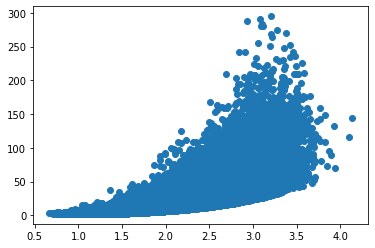

In [55]:
plt.scatter(np.log2(IRI1A.fc), IRI1A.neglogq)

In [40]:
import rpy2.ipython
%reload_ext rpy2.ipython

# suppress excessive warnings such as RRuntimeWarning
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

In [41]:
%%R
library(UpSetR)

In [44]:
%%R
mutations <- read.csv( system.file("extdata", "mutations.csv", package = "UpSetR"), header=T, sep = ",")

In [51]:
%%R
head(mutations, n=3)

  Identifier TTN PTEN TP53 EGFR MUC16 FLG RYR2 PCLO PIK3R1 PIK3CA NF1 MUC17
1    02-0003   0    0    1    1     0   0    0    0      1      0   0     1
2    02-0033   0    0    1    0     0   0    0    0      0      1   1     0
3    02-0047   0    0    0    0     0   0    1    0      0      1   0     0
  HMCN1 SPTA1 USH2A RB1 PKHD1 OBSCN AHNAK2 RYR3 RELN FRAS1 GPR98 DNAH5 ATRX
1     0     0     0   0     0     0      0    0    0     0     0     1    0
2     0     0     0   1     0     0      0    0    0     0     0     0    0
3     0     0     0   0     0     0      0    1    0     0     0     0    0
  APOB TCHH SYNE1 LRP2 KEL HRNR DNAH3 COL6A3 MUC5B LAMA1 DSP DNAH8 CNTNAP2 SDK1
1    0    0     0    0   0    0     0      0     0     0   0     0       0    0
2    0    0     0    0   0    0     0      0     0     0   0     0       0    0
3    0    0     0    0   0    0     0      0     0     0   0     0       0    0
  NBPF10 DNAH2 NLRP5 MLL3 IDH1 HCN1 FCGBP DOCK5 RIMS2 PCDHA1 MXRA5 HEATR

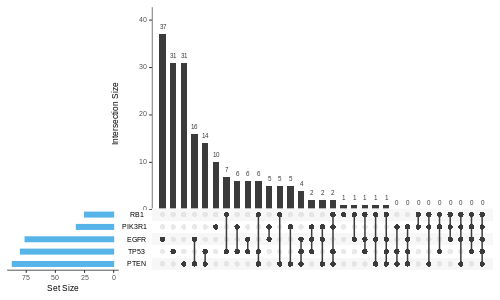

In [49]:
%%R -h 300 -w 500 -u px
upset(mutations, sets = c("PTEN", "TP53", "EGFR", "PIK3R1", "RB1"), sets.bar.color = "#56B4E9",
order.by = "freq", empty.intersections = "on")